<a href="https://colab.research.google.com/github/ChutikarnJuntaramanee/Jupyter_Data_Visualization/blob/master/ASSFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [183]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv')
df

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,6480.0,35640.0,710.0,4260,2793.0,8910.0,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,850.0,1700.0,280.0,560,137.2,425.0,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,700.0,700.0,280.0,280,68.6,70.0,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,990.0,990.0,280.0,280,88.9,99.0,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,850.0,1700.0,380.0,760,151.2,425.0,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1/4/2019 16:01,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,650.0,1300.0,280.0,560,130.2,325.0,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN
3200,1/4/2019 15:54,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,650.0,1950.0,280.0,840,195.3,487.5,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN
3201,1/4/2019 8:31,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,1350.0,2700.0,0.0,0,189.0,675.0,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN
3202,1/2/2019 16:06,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,5000.0,5000.0,680.0,680,397.6,1250.0,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at               3204 non-null   object 
 1   order_id                 3204 non-null   object 
 2   rent_channel             3204 non-null   object 
 3   payment_method           3201 non-null   object 
 4   car                      3121 non-null   object 
 5   car__owner__user_status  3121 non-null   object 
 6   car__brand               3121 non-null   object 
 7   car__model               3121 non-null   object 
 8   rental_category          3195 non-null   object 
 9   total_period             3204 non-null   float64
 10  price_per_day            3204 non-null   float64
 11  total_price              3204 non-null   float64
 12  insurance_price          3203 non-null   float64
 13  insurance_amount         3204 non-null   int64  
 14  vat_amount              

In [185]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [186]:
df['month'] = df['created_at'].dt.month

In [187]:
df['year'] = df['created_at'].dt.year

In [188]:
df

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at,month,year
0,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,6480.0,35640.0,710.0,4260,2793.0,8910.0,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN,12,2019
1,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,850.0,1700.0,280.0,560,137.2,425.0,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN,12,2019
2,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,700.0,700.0,280.0,280,68.6,70.0,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN,12,2019
3,2019-12-30 23:05:00,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,990.0,990.0,280.0,280,88.9,99.0,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN,12,2019
4,2019-12-30 20:28:00,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,850.0,1700.0,380.0,760,151.2,425.0,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,2019-01-04 16:01:00,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,650.0,1300.0,280.0,560,130.2,325.0,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN,1,2019
3200,2019-01-04 15:54:00,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,650.0,1950.0,280.0,840,195.3,487.5,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN,1,2019
3201,2019-01-04 08:31:00,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,1350.0,2700.0,0.0,0,189.0,675.0,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN,1,2019
3202,2019-01-02 16:06:00,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,5000.0,5000.0,680.0,680,397.6,1250.0,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN,1,2019


In [189]:
data = df.dropna()
df.isnull().sum()

created_at                    0
order_id                      0
rent_channel                  0
payment_method                3
car                          83
car__owner__user_status      83
car__brand                   83
car__model                   83
rental_category               9
total_period                  0
price_per_day                 0
total_price                   0
insurance_price               1
insurance_amount              0
vat_amount                    0
commission                    0
discount_amount               1
promotion_amount              0
redeem_amount                 1
total_amount                  0
hold_amount                   0
tax_withholding               1
status                        0
confirm_at                    0
complete_at                1100
cancel_at                  2929
month                         0
year                          0
dtype: int64

In [190]:
data.head(5)

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at,month,year
63,2019-12-25 10:08:00,DM4675-25671,ios,credit,4675:Hyundai H1,private,Hyundai,H1,car,4.0,2800.00,11200.00,710.0,2840,786.80,2100.000,2800.0,2800.0,0.0,12026.8,0,0.0,complete,19:39.3,15:12.8,12/25/2019 11:09,12,2019
171,2019-12-18 14:19:00,DM5947-25057,ios,credit,5782:Toyota Yaris,private,Toyota,Yaris,car,3.0,800.00,2400.00,0.0,0,168.00,480.000,0.0,0.0,0.0,2568.0,0,0.0,complete,12/18/2019 14:38,14:02.8,12/18/2019 14:22,12,2019
175,2019-12-18 10:38:00,DM1195-25036,web,cash,4404:Toyota C-HR,local,Toyota,C-HR,car,6.0,1900.00,11400.00,0.0,0,798.00,2280.000,0.0,0.0,0.0,12198.0,5000,0.0,complete,22:52.9,14:32.2,12/18/2019 10:49,12,2019
212,2019-12-16 14:27:00,DM5254-24877,phone,transfer,5254:Toyota Altis,local,Toyota,Altis,airport,1.0,607.48,607.48,0.0,0,42.52,121.496,0.0,0.0,0.0,650.0,0,0.0,complete,19:54.4,43:40.3,12/16/2019 17:16,12,2019
317,2019-12-11 09:38:00,DM4875-24359,phone,transfer,4875:Toyota Fortuner,private,Toyota,Fortuner,car,2.0,1390.00,2780.00,480.0,960,261.80,695.000,0.0,0.0,0.0,4001.8,20000,0.0,cancel,12/11/2019 9:42,12/12/2019 8:13,53:59.7,12,2019


In [191]:
#choose only complete status
data_complete = data[(data['status'] == 'complete')]
#data1 = data_complete[['car__brand','commission']]
#data1 = data_complete.groupby(['commission])['car__brand'].sum()
data1 = data_complete.groupby(['month'])['total_amount'].sum()
data1

month
8      8656.30
9      9051.96
10    34507.50
11    43565.25
12    39485.65
Name: total_amount, dtype: float64

In [192]:
#data1 = data_complete.groupby(['car__brand])['commission'].sum()
#data1.head(10)
#data2 = data_complete['commission'].idxmax()
#data2
data3=data_complete[data_complete['commission']==0]
data3 = data_complete.sort_values(by=['car__brand','commission'])
data3 = data_complete[['car__brand','commission']]
data3

#condition_1 = df_transac['Qty'] >= 2
#condition_2 = df_transac['Store_type'] =='e-Shop'
#df_transac[ (condition_1) & (condition_2)]

,car__brand,commission
63,Hyundai,2100.000
171,Toyota,480.000
175,Toyota,2280.000
212,Toyota,121.496
469,Toyota,595.000
483,Honda,987.500
490,Toyota,550.000
529,Mazda,99.000
641,Mitsubishi,89.000
706,Toyota,2640.000


In [193]:
data3.info

<bound method DataFrame.info of       car__brand  commission
63       Hyundai    2100.000
171       Toyota     480.000
175       Toyota    2280.000
212       Toyota     121.496
469       Toyota     595.000
483        Honda     987.500
490       Toyota     550.000
529        Mazda      99.000
641   Mitsubishi      89.000
706       Toyota    2640.000
751       Toyota     318.000
861       Toyota     300.000
907       Toyota    1375.000
964       Toyota     600.000
1053       Mazda     800.000
1137      Toyota     750.000
1179      Toyota     600.000
1204       Honda    1323.000
1245      Toyota    1680.000
1318      Toyota     300.000
1521      Toyota    1050.000
1524      Toyota    1200.000
1545      Toyota     620.000
1567       Honda     120.000
1634      Toyota     500.000
1739       Honda     425.000
1790      Toyota     120.000
1829      Toyota     325.000
1845      Toyota     720.000
1924      Toyota     599.500
2137      Toyota     422.500
2213      Toyota     320.000
2245     Hy

In [194]:
data5 = data_complete.groupby(['car__model'])['commission'].agg(['sum','count'])
data5

,sum,count
car__model,,
2,899.000,2
Alphard,1375.000,1
Altis,1046.496,3
Attrage,89.000,1
C-HR,3218.000,3
Camry,1680.000,1
City,1412.500,2
Civic,120.000,1
Fortuner,2250.000,3


In [195]:
#Show the total and number of each car brand
data5 = data_complete.groupby(['car__brand'])['commission'].agg(['sum','count'])
data5

,sum,count
car__brand,,
Honda,2855.500,4
Hyundai,3300.000,2
Mazda,899.000,2
Mitsubishi,89.000,1
Toyota,18466.496,24


In [196]:
#Then we get the most popular and the hightest commission on toyota.
#So, let's see hoe much we sell in each month
#data6 = data_complete[['car__model','commission', 'month']]
data_Toyata = data6[(data_complete['car__brand'] == 'Toyota')]
#data_Toyata = data_Toyata.groupby(['car__model', 'month'])['commission'].agg(['sum','count'])
#data_Toyata = data_Toyata.groupby(['month'])['commission'].agg(['sum','count'])
data_Toyata = data_Toyata.groupby(['month'])['commission'].agg(['sum'])
data_Toyata

,sum
month,
8,742.500
9,1644.500
10,5470.000
11,6583.000
12,4026.496


TypeError: ignored

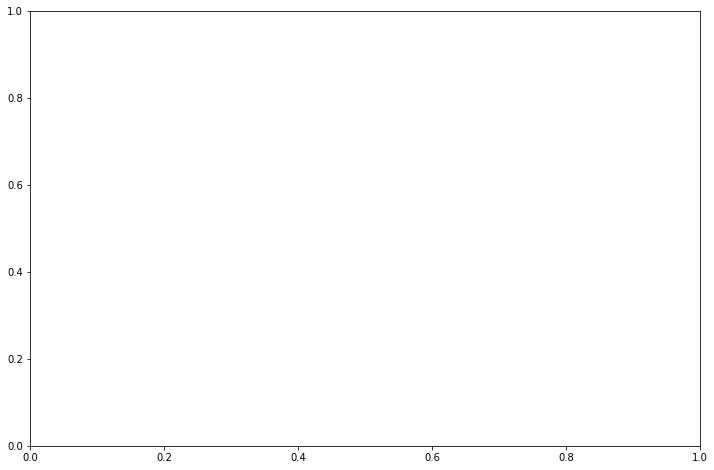

In [253]:
month = range(8,13)
ma = data_Toyata.rolling(window = 3, center=True).mean()
plt.figure(figsize=(12,8))
df8 =  data_Toyata.groupby(['month'])['sum'].agg(['sum'])
plt.bar(month , df8)
plt.plot(ma, c='r', linewidth=3, label='Moving average')
plt.ylabel('Total amount (million)')
plt.xlabel('Month')
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(month)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Text(0, 0.5, 'Commission')

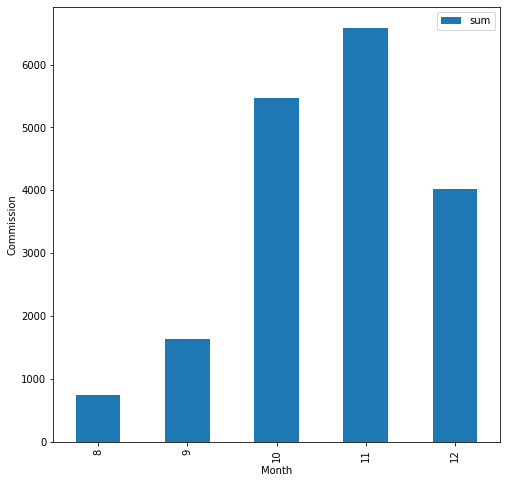

In [203]:
#Toyota
data_Toyata.plot(kind='bar',figsize=(8,8))
plt.xlabel('Month')
plt.ylabel('Commission')

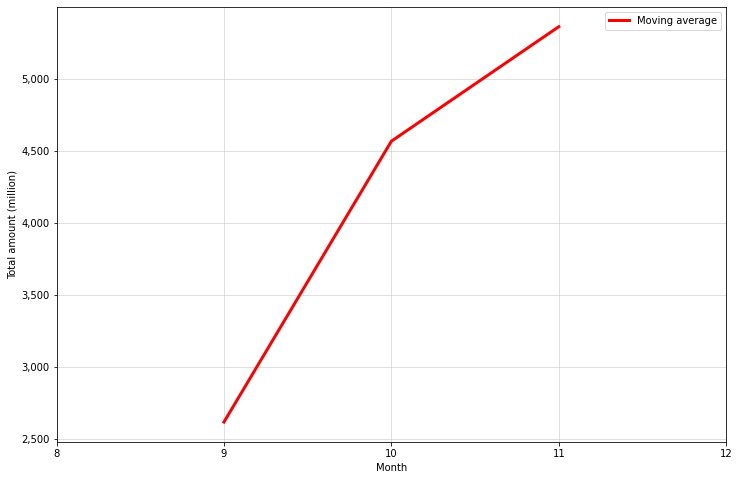

In [200]:
#visualization

month = range(8,13)
m_avg = data_Toyata.rolling(window = 3, center=True).mean()
plt.figure(figsize=(12,8))
plt.plot(m_avg, c='r', linewidth=3, label='Moving average')
plt.ylabel('Total amount (million)')
plt.xlabel('Month')
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(month)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()


In [209]:
from sklearn.linear_model import LinearRegression

X = np.arange(8, 13).reshape(-1,1)
y = data_Toyata.values

linear = LinearRegression().fit(X, y)
print('model acc =', linear.score(X, y))

X_fit = np.arange(1, 16).reshape(-1,1)
y_linear = linear.predict(X_fit)
print(y_linear)


model acc = 0.5399019882307997
[[-6662.5436]
 [-5511.8944]
 [-4361.2452]
 [-3210.596 ]
 [-2059.9468]
 [ -909.2976]
 [  241.3516]
 [ 1392.0008]
 [ 2542.65  ]
 [ 3693.2992]
 [ 4843.9484]
 [ 5994.5976]
 [ 7145.2468]
 [ 8295.896 ]
 [ 9446.5452]]


In [212]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

X_ = transformer.fit_transform(X)

poly = LinearRegression().fit(X_, y)
print('model acc =', poly.score(X_, y))

X_fit_ = transformer.fit_transform(X_fit)
y_poly = poly.predict(X_fit_)
print(y_poly)

model acc = 0.8099924255261061
[[-6.10004816e+04]
 [-4.81568584e+04]
 [-3.66888792e+04]
 [-2.65965440e+04]
 [-1.78798528e+04]
 [-1.05388056e+04]
 [-4.57340240e+03]
 [ 1.63568000e+01]
 [ 3.23047200e+03]
 [ 5.06894320e+03]
 [ 5.53177040e+03]
 [ 4.61895360e+03]
 [ 2.33049280e+03]
 [-1.33361200e+03]
 [-6.37336080e+03]]


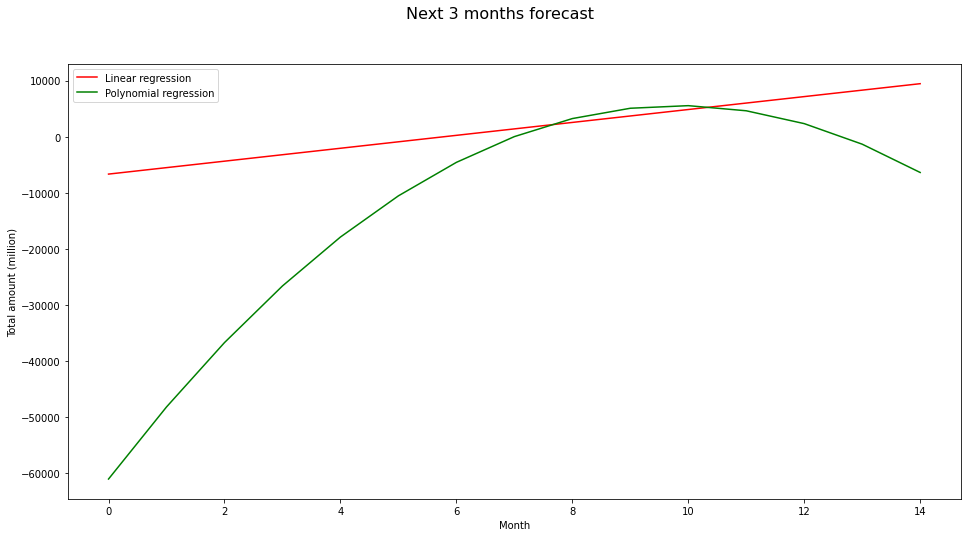

In [213]:
#This graph show about next 3 months forecast
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
#Plot the regression model
plt.plot(y_linear, color='r', label='Linear regression')
#Plot the future predictions
plt.plot(y_poly, color='g', label='Polynomial regression')
#Set the title of the graph
plt.suptitle('Next 3 months forecast', fontsize=16)
plt.ylabel('Total amount (million)')
plt.xlabel('Month')
plt.legend()

In [229]:
dfnew = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv')
dfnew

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,6480.0,35640.0,710.0,4260,2793.0,8910.0,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,850.0,1700.0,280.0,560,137.2,425.0,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,700.0,700.0,280.0,280,68.6,70.0,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,990.0,990.0,280.0,280,88.9,99.0,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,850.0,1700.0,380.0,760,151.2,425.0,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1/4/2019 16:01,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,650.0,1300.0,280.0,560,130.2,325.0,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN
3200,1/4/2019 15:54,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,650.0,1950.0,280.0,840,195.3,487.5,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN
3201,1/4/2019 8:31,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,1350.0,2700.0,0.0,0,189.0,675.0,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN
3202,1/2/2019 16:06,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,5000.0,5000.0,680.0,680,397.6,1250.0,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN


In [230]:
dfnew.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
count,3204.000000,3204.000000,3204.000000,3203.000000,3204.000000,3204.000000,3204.000000,3203.000000,3204.000000,3203.000000,3204.000000,3204.000000,3203.000000
mean,3.431336,1597.692016,4538.984366,151.849741,411.404182,333.673358,1076.237452,92.834858,86.087828,3.933812,5082.296974,3971.598939,30.775946
std,5.990337,5710.345390,10935.219654,215.835668,851.681707,764.530903,4060.185364,829.128406,473.727057,41.257687,11630.301453,4908.988156,184.318606
min,1.000000,350.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,800.000000,1200.000000,0.000000,0.000000,89.600000,225.000000,0.000000,0.000000,0.000000,1369.600000,0.000000,0.000000
50%,2.000000,1000.000000,2400.000000,0.000000,0.000000,176.400000,525.000000,0.000000,0.000000,0.000000,2675.000000,5000.000000,0.000000
75%,3.000000,1500.000000,4447.500000,280.000000,560.000000,333.900000,1000.000000,0.000000,0.000000,0.000000,5093.200000,5000.000000,0.000000
max,90.000000,300000.000000,300000.000000,710.000000,14880.000000,21000.000000,180000.000000,25000.000000,12240.000000,600.000000,321000.000000,50000.000000,4250.000000


In [235]:
#Use status as target in classification
num_columns = data2.describe().columns
obj_columns = data2.columns[data2.dtypes=='object'].drop('status')
# Delete outliers
dfnew = data2
factor = 3
for col in num_columns:
    upper = data2[col].mean() + data2[col].std()*factor
    lower = data2[col].mean() - data2[col].std()*factor
    dfnew = dfnew[dfnew[col] <= upper]
    dfnew = dfnew[dfnew[col] >= lower]
dfnew.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month,year
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.0
mean,1.719512,1356.453415,2340.721707,121.951220,174.634146,169.414878,457.793256,0.0,12.195122,0.0,2641.904878,4878.048780,3.353659,10.365854,2019.0
std,0.851827,824.022597,1730.902962,184.664825,287.063561,125.227311,373.636030,0.0,78.086881,0.0,1871.811655,6173.309979,15.167500,1.178051,0.0
min,1.000000,467.290000,467.290000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,500.000000,0.000000,0.000000,8.000000,2019.0
25%,1.000000,845.000000,1100.000000,0.000000,0.000000,77.000000,128.505000,0.0,0.000000,0.0,1193.400000,0.000000,0.000000,10.000000,2019.0
50%,1.000000,1200.000000,1700.000000,0.000000,0.000000,118.300000,325.000000,0.0,0.000000,0.0,2280.000000,5000.000000,0.000000,10.000000,2019.0
75%,2.000000,1500.000000,3000.000000,280.000000,280.000000,221.200000,600.000000,0.0,0.000000,0.0,3381.200000,5000.000000,0.000000,11.000000,2019.0
max,4.000000,5000.000000,8400.000000,610.000000,1120.000000,588.000000,1680.000000,0.0,500.000000,0.0,8988.000000,20000.000000,79.000000,12.000000,2019.0


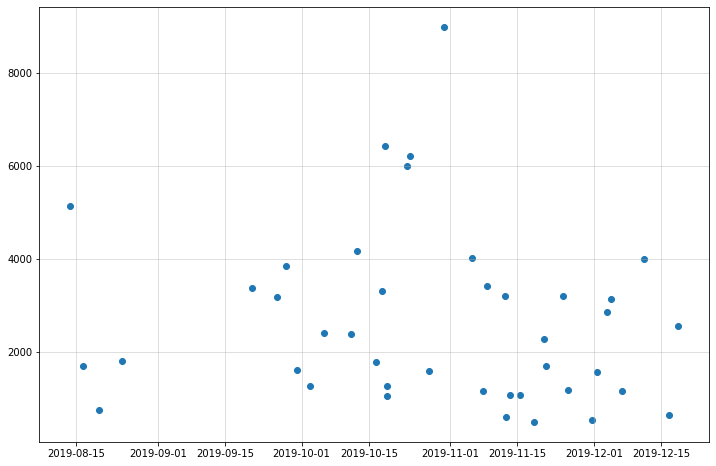

In [255]:
x = dfnew['created_at']
y = dfnew['total_amount']
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.grid(alpha=0.5)
plt.show()

In [237]:
#Log transformation
dflog = dfnew[num_columns].applymap(lambda x: np.log(x+1))
cols = [*obj_columns, 'status', 'created_at']
dflog = dflog.join(dfnew[cols])
dflog.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month,year
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,0.956270,7.083146,7.512603,1.991898,2.093113,4.802365,5.695257,0.0,0.151625,0.0,7.640466,5.362574,0.206537,2.425129,7.610853e+00
std,0.295202,0.493419,0.719634,2.806212,2.955541,1.048234,1.233485,0.0,0.970871,0.0,0.720122,4.365417,0.923964,0.107328,4.496061e-15
min,0.693147,6.149088,6.149088,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,6.216606,0.000000,0.000000,2.197225,7.610853e+00
25%,0.693147,6.740519,7.003974,0.000000,0.000000,4.356709,4.863719,0.0,0.000000,0.0,7.085399,0.000000,0.000000,2.397895,7.610853e+00
50%,0.693147,7.090910,7.438972,0.000000,0.000000,4.781641,5.786897,0.0,0.000000,0.0,7.732369,8.517393,0.000000,2.397895,7.610853e+00
75%,1.098612,7.313887,8.006701,5.638355,5.638355,5.403578,6.398595,0.0,0.000000,0.0,8.126282,8.517393,0.000000,2.484907,7.610853e+00
max,1.609438,8.517393,9.036106,6.415097,7.021976,6.378426,7.427144,0.0,6.216606,0.0,9.103757,9.903538,4.382027,2.564949,7.610853e+00


In [238]:
#One hot encoding
df_ohe = dflog
for col in obj_columns.drop(['order_id', 'car']):
    cat_list = 'col'+'_'+col
    cat_list = pd.get_dummies(df_ohe[col], prefix=col)
    df_ohe = df_ohe.join(cat_list)
df_ohe = df_ohe.drop(columns=[*obj_columns, 'created_at'])
df_ohe.columns

Index(['total_period', 'price_per_day', 'total_price', 'insurance_price',
       'insurance_amount', 'vat_amount', 'commission', 'discount_amount',
       'promotion_amount', 'redeem_amount',
       ...
       'cancel_at_31:58.8', 'cancel_at_37:19.9', 'cancel_at_52:38.2',
       'cancel_at_53:59.7', 'cancel_at_58:09.7', 'cancel_at_8/13/2019 17:05',
       'cancel_at_8/16/2019 11:48', 'cancel_at_8/24/2019 13:26',
       'cancel_at_9/27/2019 18:22', 'cancel_at_9/30/2019 10:01'],
      dtype='object', length=174)

In [239]:
df_ohe.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month,year,rent_channel_android,rent_channel_ios,rent_channel_line,rent_channel_phone,rent_channel_web,payment_method_cash,payment_method_credit,payment_method_transfer,car__owner__user_status_local,car__owner__user_status_private,car__owner__user_status_pro,car__brand_Honda,car__brand_Hyundai,car__brand_Mazda,car__brand_Mini,car__brand_Mitsubishi,car__brand_Nissan,car__brand_Toyota,car__model_2,car__model_Almera,car__model_Altis,car__model_Attrage,car__model_C-HR,car__model_Camry,car__model_City,...,cancel_at_01:24.6,cancel_at_05:17.5,cancel_at_09:02.5,cancel_at_10/11/2019 9:10,cancel_at_10/16/2019 16:57,cancel_at_10/17/2019 19:43,cancel_at_10/18/2019 16:28,cancel_at_10/28/2019 17:28,cancel_at_10/3/2019 17:07,cancel_at_10/30/2019 17:00,cancel_at_10/5/2019 15:18,cancel_at_11/12/2019 12:55,cancel_at_11/13/2019 14:50,cancel_at_11/15/2019 15:31,cancel_at_11/21/2019 16:12,cancel_at_11/25/2019 15:19,cancel_at_11/5/2019 16:57,cancel_at_11/8/2019 17:12,cancel_at_12/1/2019 15:38,cancel_at_12/16/2019 17:16,cancel_at_12/18/2019 14:22,cancel_at_12/3/2019 17:53,cancel_at_12/6/2019 16:40,cancel_at_17:35.4,cancel_at_18:14.2,cancel_at_20:07.8,cancel_at_22:24.7,cancel_at_23:42.9,cancel_at_26:27.2,cancel_at_28:34.2,cancel_at_31:58.8,cancel_at_37:19.9,cancel_at_52:38.2,cancel_at_53:59.7,cancel_at_58:09.7,cancel_at_8/13/2019 17:05,cancel_at_8/16/2019 11:48,cancel_at_8/24/2019 13:26,cancel_at_9/27/2019 18:22,cancel_at_9/30/2019 10:01
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cancel,0.870097,7.043458,7.335657,1.735649,1.817030,4.449628,5.278759,0.0,0.000000,0.0,7.460298,5.755868,0.000000,2.430360,7.610853,0.058824,0.176471,0.000000,0.470588,0.294118,0.411765,0.117647,0.470588,0.647059,0.352941,0.000000,0.058824,0.058824,0.000000,0.058824,0.176471,0.058824,0.588235,0.000000,0.058824,0.117647,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000
complete,1.017310,7.111259,7.637940,2.173408,2.288673,5.052221,5.990276,0.0,0.259025,0.0,7.768086,5.083991,0.352833,2.421425,7.610853,0.041667,0.208333,0.041667,0.041667,0.666667,0.250000,0.458333,0.291667,0.458333,0.500000,0.041667,0.083333,0.041667,0.083333,0.000000,0.041667,0.000000,0.750000,0.083333,0.000000,0.083333,0.041667,0.083333,0.041667,0.041667,...,0.000000,0.000000,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667


In [240]:
df_ohe = df_ohe[dfnew['status']!='success']
old_values = ['complete', 'cancel']
new_values = [1, 0]
df_ohe['status'] = df_ohe['status'].replace(old_values, new_values)
df_ohe['status'].value_counts()

1    24
0    17
Name: status, dtype: int64

In [241]:
df_ohe.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month,year,rent_channel_android,rent_channel_ios,rent_channel_line,rent_channel_phone,rent_channel_web,payment_method_cash,payment_method_credit,payment_method_transfer,car__owner__user_status_local,car__owner__user_status_private,car__owner__user_status_pro,car__brand_Honda,car__brand_Hyundai,car__brand_Mazda,car__brand_Mini,car__brand_Mitsubishi,car__brand_Nissan,car__brand_Toyota,car__model_2,car__model_Almera,car__model_Altis,car__model_Attrage,car__model_C-HR,car__model_Camry,car__model_City,...,cancel_at_01:24.6,cancel_at_05:17.5,cancel_at_09:02.5,cancel_at_10/11/2019 9:10,cancel_at_10/16/2019 16:57,cancel_at_10/17/2019 19:43,cancel_at_10/18/2019 16:28,cancel_at_10/28/2019 17:28,cancel_at_10/3/2019 17:07,cancel_at_10/30/2019 17:00,cancel_at_10/5/2019 15:18,cancel_at_11/12/2019 12:55,cancel_at_11/13/2019 14:50,cancel_at_11/15/2019 15:31,cancel_at_11/21/2019 16:12,cancel_at_11/25/2019 15:19,cancel_at_11/5/2019 16:57,cancel_at_11/8/2019 17:12,cancel_at_12/1/2019 15:38,cancel_at_12/16/2019 17:16,cancel_at_12/18/2019 14:22,cancel_at_12/3/2019 17:53,cancel_at_12/6/2019 16:40,cancel_at_17:35.4,cancel_at_18:14.2,cancel_at_20:07.8,cancel_at_22:24.7,cancel_at_23:42.9,cancel_at_26:27.2,cancel_at_28:34.2,cancel_at_31:58.8,cancel_at_37:19.9,cancel_at_52:38.2,cancel_at_53:59.7,cancel_at_58:09.7,cancel_at_8/13/2019 17:05,cancel_at_8/16/2019 11:48,cancel_at_8/24/2019 13:26,cancel_at_9/27/2019 18:22,cancel_at_9/30/2019 10:01
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.870097,7.043458,7.335657,1.735649,1.817030,4.449628,5.278759,0.0,0.000000,0.0,7.460298,5.755868,0.000000,2.430360,7.610853,0.058824,0.176471,0.000000,0.470588,0.294118,0.411765,0.117647,0.470588,0.647059,0.352941,0.000000,0.058824,0.058824,0.000000,0.058824,0.176471,0.058824,0.588235,0.000000,0.058824,0.117647,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.017310,7.111259,7.637940,2.173408,2.288673,5.052221,5.990276,0.0,0.259025,0.0,7.768086,5.083991,0.352833,2.421425,7.610853,0.041667,0.208333,0.041667,0.041667,0.666667,0.250000,0.458333,0.291667,0.458333,0.500000,0.041667,0.083333,0.041667,0.083333,0.000000,0.041667,0.000000,0.750000,0.083333,0.000000,0.083333,0.041667,0.083333,0.041667,0.041667,...,0.000000,0.000000,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.041667,0.041667,0.041667


In [242]:
X = df_ohe.drop(columns=['status'])
y = df_ohe['status']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data=X_os, columns=X.columns )
y_os = pd.DataFrame(data=y_os, columns=['status'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.25, random_state=0)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()

logis_reg.fit(X_train, y_train.values.ravel())

y_pred = logis_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3 0]
 [4 5]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.56      0.71         9

    accuracy                           0.67        12
   macro avg       0.71      0.78      0.66        12
weighted avg       0.86      0.67      0.69        12



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


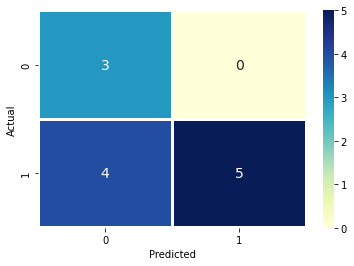

In [243]:
sns.heatmap(confusion_matrix(y_test, y_pred), linewidths=2, linecolor='w', cmap='YlGnBu',
            annot=True, fmt='.0f', annot_kws={"fontsize":14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [244]:
from sklearn.naive_bayes import GaussianNB
naive_bay = GaussianNB()

naive_bay.fit(X_train, y_train.values.ravel())

y_pred = naive_bay.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 1]
 [7 2]]
              precision    recall  f1-score   support

           0       0.22      0.67      0.33         3
           1       0.67      0.22      0.33         9

    accuracy                           0.33        12
   macro avg       0.44      0.44      0.33        12
weighted avg       0.56      0.33      0.33        12



In [245]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train.values.ravel())

y_pred = svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3 0]
 [4 5]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.56      0.71         9

    accuracy                           0.67        12
   macro avg       0.71      0.78      0.66        12
weighted avg       0.86      0.67      0.69        12

